In [2]:
# librerias
import numpy as np
import matplotlib.pyplot as plt

# Datos físicos
k = 0.5
L = 10

# Discretización del espacio
dx = 2.5
Nx = int(L/dx) + 1 # cantidad nodos 
x = np.linspace(0,L,Nx)

# discretizaciòn del tiempo
dt = 1 # debe cumplir dt<= (1/2)(dx^2/k)
Tsimu = 50
Nt = int(Tsimu/dt) + 1
t = np.linspace(0,Tsimu,Nt)


# variables computacionales para la soluciòn del problema
T = np.zeros((Nx,Nt)) # filas son las temperaturas en el espacio # columnas por cada tiempo

# Condicones de frontera:
T[0,:] = 100
T[-1,:] = 50
# Condiciones iniciales:
T[1:Nx-1,0] = 25


In [3]:
# Solución por método explícito
lamb = k*dt/dx**2
for l in range(0,Nt-1):
    for i in range(1,Nx-1):
        T[i,l+1] = T[i,l] + lamb*(T[i+1,l]-2*T[i,l]+T[i-1,l])


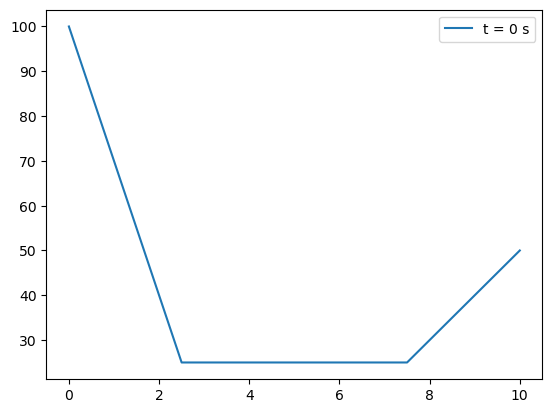

In [4]:
# animación de la barra
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots() # creando la figura y ejes
line, = ax.plot(x,T[:,0]) # línea inicial

def update(num):
    line.set_ydata(T[:,num])
    line.set_label('t = ' + str(num*dt) + ' s')
    ax.legend()
    return line,
ani = animation.FuncAnimation(fig, update, frames=Nt, interval=100)

HTML(ani.to_jshtml())

In [ ]:
# graficando la barra como un elemento de 2D
# ancho de la barra y su discretizaciòn
y = np.linspace(0,1,5)

# Creando la malla 2D
X, Y = np.meshgrid(x,y)
# variable informatica donde almacenar la temperatura
T1d = np.zeros((len(y),Nx,Nt))

# Dandole valores ya calculados de la barra
for l in range(Nt):
    for i in range(Nx):
        T1d[:,i,l] = T[i,l]
        

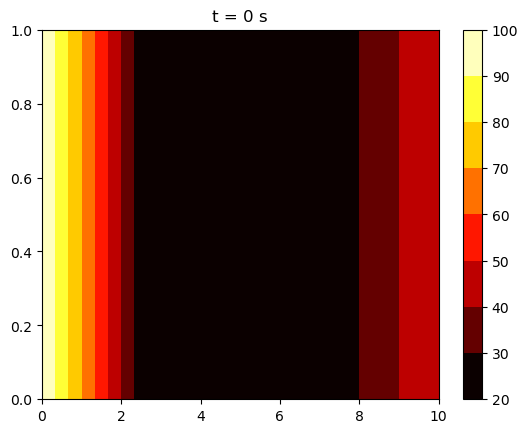

In [14]:
fig2, ax2 = plt.subplots()
c = ax2.contourf(X,Y,T1d[:,:,0], cmap='hot', vmin = 25, vmax = 100)
fig2.colorbar(c)

def update2(num):
    ax2.clear()
    c = ax2.contourf(X,Y,T1d[:,:,num], cmap='hot', vmin = 25, vmax = 100)
    ax2.set_title('t = ' + str(num*dt) + ' s')
    return c,
ani2 = animation.FuncAnimation(fig2, update2, frames=Nt, interval=100)
HTML(ani2.to_jshtml())

In [16]:
# Dos dimensiones
import numpy as np
import matplotlib.pyplot as plt

# Datos fìsicos
k2d = 0.5
Lx2d = 10
Ly2d = 10

# discretizaciòn del espacio
dx2d = 1
dy2d = 1
Nx2d = int(Lx2d/dx2d) + 1
Ny2d = int(Ly2d/dy2d) + 1
x2d = np.linspace(0,Lx2d,Nx2d)
y2d = np.linspace(0,Ly2d,Ny2d)

X2d,Y2d = np.meshgrid(x2d,y2d)

# Discretizaciònd el tiempo
dt2d = 0.25 # debe cumplir 1/8 * (dx^2+dy^2)/k
Tsimu2d = 10
Nt2d = int(Tsimu2d/dt2d) + 1
t2d = np.linspace(0,Tsimu2d,Nt2d)

#variable informatica donde almacenar la temperatura
T2d = np.zeros((Ny2d,Nx2d,Nt2d))

# Condiciones iniciales
T2d[:,:,0] = 30
# Condiciones de frontera
T2d[-1,:,:] = 100
T2d[:,0,:] = 75
T2d[:,-1,:] = 50
T2d[0,:,:] = 0



In [17]:
for l in range(0,Nt2d-1):
    for i in range (1,Nx2d-1):
        for j in range (1,Ny2d-1):
            T2d[j,i,l+1] = T2d[j,i,l] + k2d*dt2d*((T2d[j,i+1,l]-2*T2d[j,i,l]+T2d[j,i-1,l])/dx2d**2 + (T2d[j+1,i,l]-2*T2d[j,i,l]+T2d[j-1,i,l])/dy2d**2)

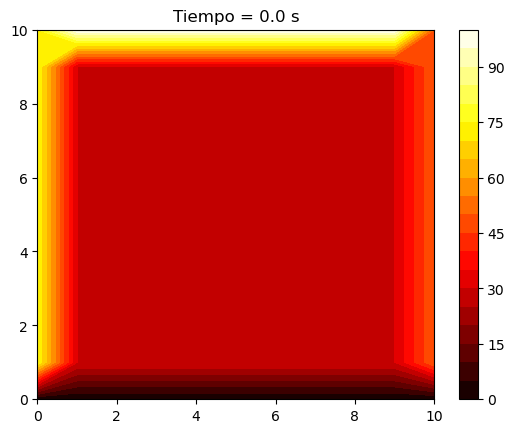

In [19]:
import matplotlib.animation as animation
from IPython.display import HTML

fig4, ax4 = plt.subplots() # figura y ejes
grafico = ax4.contourf(X2d,Y2d,T2d[:,:,0],20,cmap='hot', vmin = 0, vmax = 100) # grafico inicial
fig4.colorbar(grafico)

def actualizar(frame):
    ax4.clear()
    grafico = ax4.contourf(X2d,Y2d,T2d[:,:,frame],20,cmap='hot', vmin = 0, vmax = 100) # grafico en el tiempo frame
    ax4.set_title(f'Tiempo = {t2d[frame]:.1f} s')
    return grafico

ani3 = animation.FuncAnimation(fig4, actualizar, frames=Nt2d, interval=200) # creación de la animaciòn

HTML(ani3.to_jshtml()) # mostrar la animaciòn en Jupyter Notebook
